In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
ERA5_RUN_NAME =  "64_128_rot904_sep_3e-4"
woERA5_RUN_NAME = "64_128_woERA5_rot904_sep_3e-4"

def get_data(RUN_NAME):
    BASE_DIR = f"/vol/bitbucket/pn222/models/{RUN_NAME}"
    with open(BASE_DIR + f"/metrics.pkl", "rb") as file:
        metric_dict = pickle.load(file)
    metrics = list(metric_dict["train"].keys())
    
    train_data = metric_dict["train"]
    test_data  = metric_dict["test"]

    return {
        "train_data": train_data, 
        "test_data": test_data,
    }

In [3]:
ERA5_data = get_data(ERA5_RUN_NAME)
woERA5_data = get_data(woERA5_RUN_NAME)

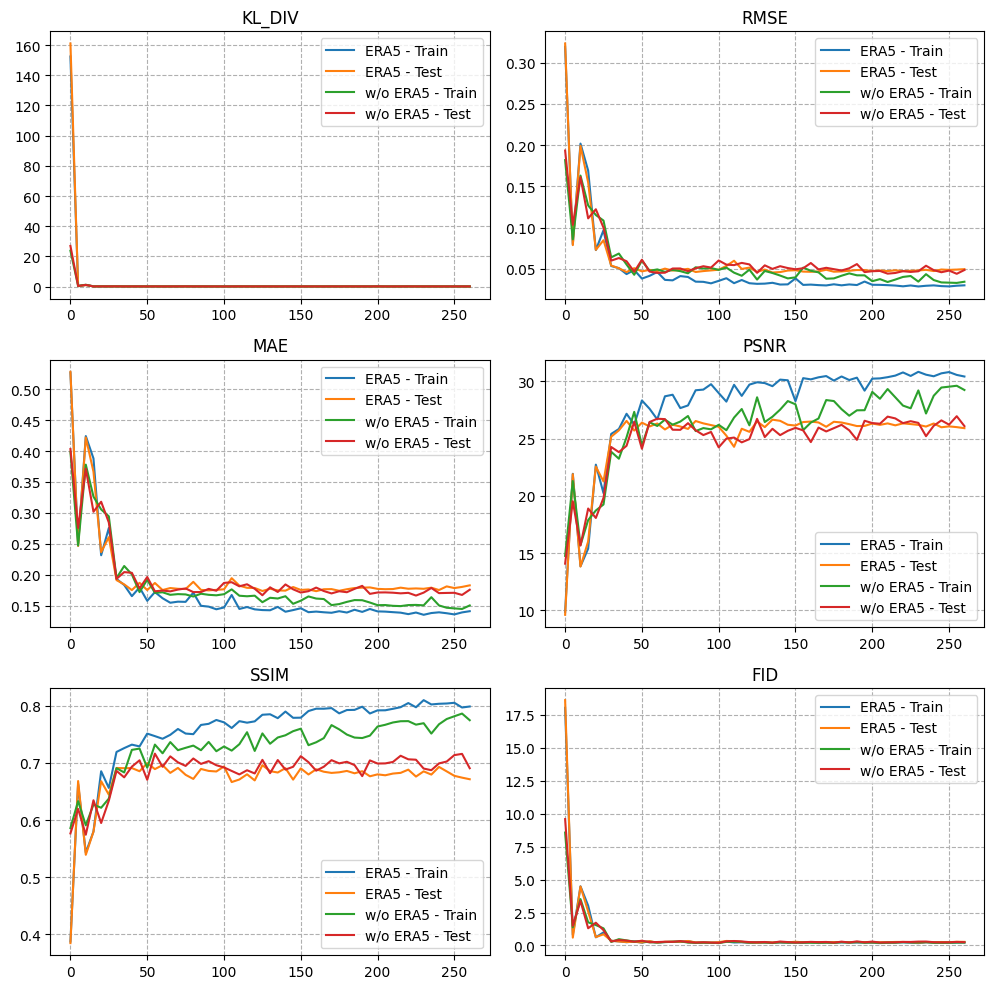

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

x = [5*x for x in range(len(ERA5_data['train_data']['kl_div']))]
metrics = list(ERA5_data['train_data'].keys())

for i, metric in enumerate(metrics):
    row = i // 2 ; col = i % 2  
    
    for mode, data in [("ERA5", ERA5_data), ("w/o ERA5", woERA5_data)]:
        axs[row][col].plot(x, data["train_data"][metric], label=f'{mode} - Train')
        axs[row][col].plot(x, data["test_data"][metric], label=f'{mode} - Test')
        axs[row][col].set_title(metric.upper()) 
        axs[row][col].legend()
        axs[row][col].grid(True, linestyle='--')   
        
plt.tight_layout()  
plt.savefig(f"../pngs/64_128/metrics_64_128_ERA5_vs_woERA5.png", bbox_inches="tight")
plt.show()